In [4]:
cd ..

/home/mars/src_aiai


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from src.operators.measurement import NUFFT_op_1D

2021-11-01 16:01:30.736753: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [7]:
non_uniform_k = np.random.rand(100) - .5 #np.array([1,3,5,7,9], dtype=float)
non_uniform_k /= np.abs(non_uniform_k).max() * np.pi # scaling between -pi,pi

In [8]:
Nd = (128,) # dimensions of real domain
Kd = (256,) # dimensions of (optionally) upsampled Fourier domain
Jd = (6,) # kernel width for interpolation/convolution

In [9]:
op = NUFFT_op_1D()
op.plan(non_uniform_k, Nd, Kd, Jd) # calculating the interpolation matrix

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 12348.90it/s]


In [10]:
x = np.ones(Nd)
y = op.dir_op(x)


In [11]:
print(x.shape, y.shape)

(128,) (100,)


In [12]:
x_dirty = op.adj_op(y)

In [13]:
print(x_dirty.shape)

(128,)


In [26]:
def ift(x, w, m):
    "direct calculation of the ift for non uniform frequencies"
    return np.array([np.sum(m * np.exp(1j*w*i)) for i in x ]) / (2*len(x))

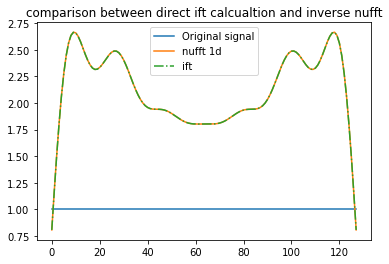

In [32]:
plt.plot(x, label='Original signal')
plt.plot(x_dirty.real, label='nufft 1d')
plt.plot(ift((np.arange(128)-64), non_uniform_k, y).real, label='ift', linestyle='-.')
plt.title("comparison between direct ift calcualtion and inverse nufft")
plt.legend()